<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/Clase7_segmentacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# importar librerias necesarias 

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/colab/images


# **THRESHOLDING** BASICO

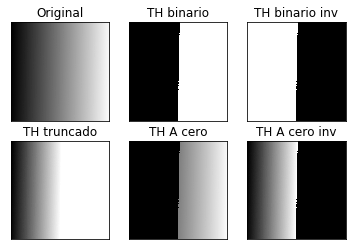

In [6]:


##Codigo bajado de:
##http://docs.opencv.org/trunk/d7/d4d/tutorial_py_thresholding.html

img = cv2.imread("gradient.png",0)
ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret, th2 = cv2.threshold(img, 127,255,cv2.THRESH_BINARY_INV)
ret, th3 = cv2.threshold(img, 127,255,cv2.THRESH_TRUNC)
ret, th4 = cv2.threshold(img, 127,255,cv2.THRESH_TOZERO)
ret, th5 = cv2.threshold(img, 127,255,cv2.THRESH_TOZERO_INV)

plt.subplot(2,3,1), plt.imshow(img,'gray'), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2), plt.imshow(th1,'gray'), plt.title("TH binario")
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3), plt.imshow(th2,'gray'), plt.title("TH binario inv")
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4), plt.imshow(th3,'gray'), plt.title("TH truncado")
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5), plt.imshow(th4,'gray'), plt.title("TH A cero")
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6), plt.imshow(th5,'gray'), plt.title("TH A cero inv")
plt.xticks([]), plt.yticks([])

plt.show()


# **THRESHOLDING** ADAPTATIVO

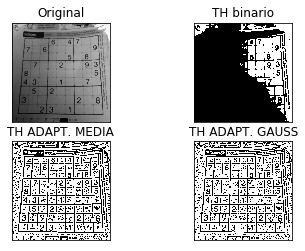

In [7]:


####Codigo bajado de:
####http://docs.opencv.org/trunk/d7/d4d/tutorial_py_thresholding.html
img = cv2.imread("sudoku2.jpg",0)
img = cv2.medianBlur(img,5)
ret, th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,1)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,1)
plt.subplot(2,2,1), plt.imshow(img,'gray'), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2), plt.imshow(th1,'gray'), plt.title("TH binario")
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3), plt.imshow(th2,'gray'), plt.title("TH ADAPT. MEDIA")
plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4), plt.imshow(th3,'gray'), plt.title("TH ADAPT. GAUSS")
plt.xticks([]), plt.yticks([])
plt.show()

# **THRESHOLDING OTSU**



El valor de threshold otsu es 127.000000:
El valor de threshold otsu sin ruido es 112.000000:


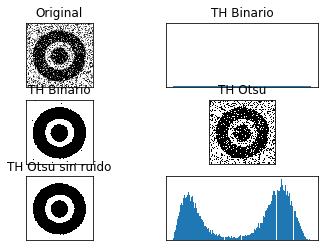

In [8]:
####Codigo bajado de:
####http://docs.opencv.org/trunk/d7/d4d/tutorial_py_thresholding.html

img=cv2.imread("bimodal_hsv_noise.png",0)
blur = cv2.GaussianBlur(img,(5,5),0)
ret1,th1 = cv2.threshold(blur,127, 255, cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("El valor de threshold otsu es %f:" % ret2)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print("El valor de threshold otsu sin ruido es %f:" % ret3)

plt.subplot(3,2,1), plt.imshow(img,'gray'), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2), plt.hist(img.ravel(),256), plt.title("TH Binario")
plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3), plt.imshow(th1,'gray'), plt.title("TH Binario")
plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4), plt.imshow(th2,'gray'), plt.title("TH Otsu")
plt.xticks([]), plt.yticks([])
plt.subplot(3,2,5), plt.imshow(th3,'gray'), plt.title("TH Otsu sin ruido")
plt.xticks([]), plt.yticks([])
plt.subplot(3,2,6), plt.hist(blur.ravel(),256)
plt.xticks([]), plt.yticks([])

plt.show()
